In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r'C:\Users\shaik\Downloads\seattle-weather.xls')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
data.columns.to_list()

['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

In [11]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


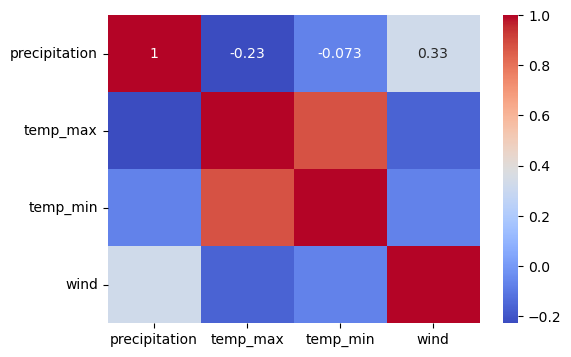

In [13]:
continuous_cols = data.select_dtypes(include='number').columns
correlation_matrix = data[continuous_cols].corr()
plt.figure(figsize=(6,4)) # size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [17]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [19]:
data.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [21]:
data['date'] = pd.to_datetime(data['date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [25]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [27]:
data['weather'][data['temp_max']==data['temp_max'].max()]

953    rain
Name: weather, dtype: object

In [29]:
data['weather'][data['temp_max']==data['temp_max'].min()]

767    sun
Name: weather, dtype: object

In [31]:
data['weather'][data['temp_min']==data['temp_min'].max()]

228      sun
545      sun
547      sun
562      sun
606     rain
1274    rain
Name: weather, dtype: object

In [33]:
data['weather'][data['temp_min']==data['temp_min'].min()]

706    sun
Name: weather, dtype: object

In [35]:
data['weather'][data['precipitation']==data['precipitation'].min()]

0       drizzle
6          rain
7           sun
10          sun
11          sun
         ...   
1448        fog
1455        sun
1458        fog
1459        sun
1460        sun
Name: weather, Length: 838, dtype: object

In [37]:
data['weather'][data['precipitation']==data['precipitation'].max()]

1169    rain
Name: weather, dtype: object

In [39]:
data['precipitation'][data['temp_max']==data['temp_max'].max()]

953    0.5
Name: precipitation, dtype: float64

In [41]:
data['precipitation'][data['temp_max']==data['temp_max'].min()]

767    0.0
Name: precipitation, dtype: float64

In [43]:
data['precipitation'][data['temp_min']==data['temp_min'].min()]

706    0.0
Name: precipitation, dtype: float64

In [47]:
data['precipitation'][data['temp_min']==data['temp_min'].max()]

228      0.0
545      0.0
547      0.0
562      0.0
606     19.3
1274     0.3
Name: precipitation, dtype: float64

In [51]:
data['precipitation'].corr(data['temp_min'])

-0.07268403986408041

<Axes: xlabel='precipitation', ylabel='temp_min'>

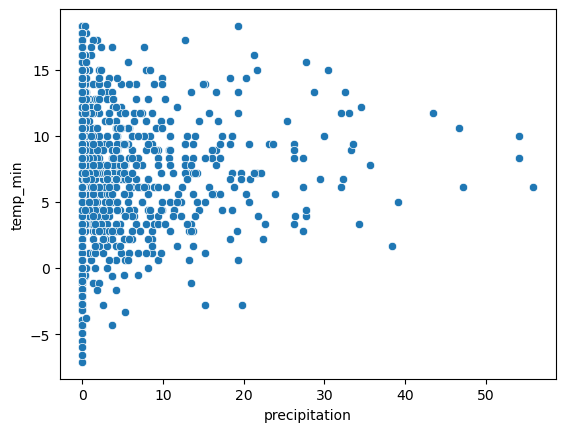

In [53]:
sns.scatterplot(x='precipitation', y='temp_min', data=data)

In [55]:
data['precipitation'].corr(data['temp_max'])

-0.22855481643297032

<Axes: xlabel='precipitation', ylabel='temp_max'>

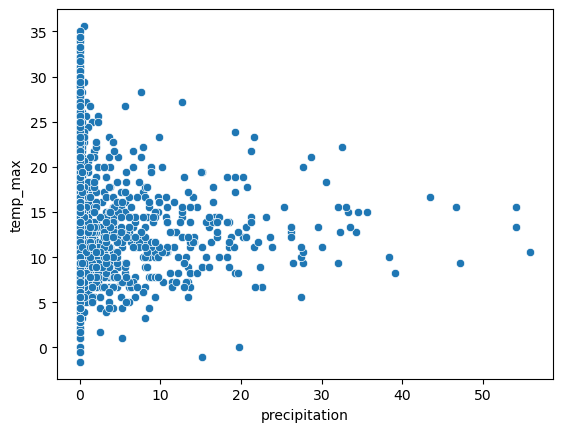

In [57]:
sns.scatterplot(x='precipitation', y='temp_max', data=data)

In [68]:
data['wind'].corr(data['temp_max'])

-0.16485663487495475

In [59]:
data['wind'].corr(data['temp_min'])


-0.07418522537325307

In [61]:
data['weather'][data['wind']==data['wind'].min()]

661    sun
Name: weather, dtype: object

In [63]:
data['weather'][data['wind']==data['wind'].max()]

351    rain
Name: weather, dtype: object

<Axes: xlabel='weather', ylabel='wind'>

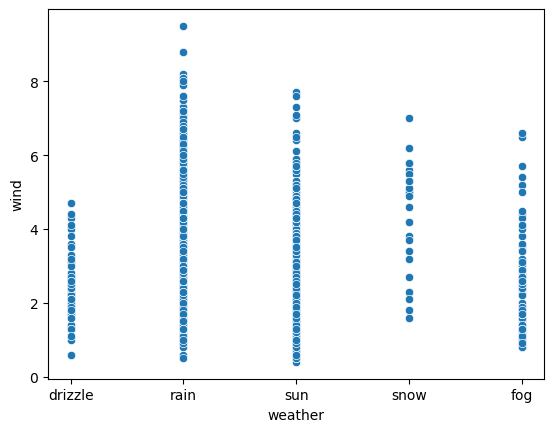

In [65]:
sns.scatterplot(x='weather', y='wind', data=data)